In [ ]:
1. 상황 변화의 시간적 특성 분석
데이터를 분석해 각 상황(안전, 관심, 주의, 위험)이 평균적으로 얼마나 지속되는지를 확인합니다.
특정 상황의 지속 시간이 매우 짧다면, 노이즈로 간주하고 제외하거나 더 긴 관찰 기간을 설정해야 합니다.
시간의 변화에 따른 기간 설정(예: 3초)

In [ ]:
0 - > 110
1 -> 80
2 -> 80
3 -> 30
300 5분 동안

oht
----------------------
0 - > 155
1 -> 89
2 -> 90
3 -> 30

6분

AGV
----------------------
30초 간격으로 5분동안 데이터를 분석
0분 ~ 5분
0분 30초 ~ 5분 30초
1분 ~ 6분

각 단계에서 일정수 이상이면 각 유형이라고 분류

     change  state  duration
0         1      0       483
1         2      1       104
2         3      2       105
3         4      3        30
4         5      0       149
..      ...    ...       ...
411     412      3        30
412     413      0       135
413     414      1        97
414     415      2        98
415     416      3        30

[416 rows x 3 columns]
       count        mean         std    min    25%    50%    75%    max
state                                                                  
0      105.0  228.704762  182.931677  119.0  142.0  155.0  175.0  914.0
1      105.0   87.419048   13.386834    4.0   80.0   89.0   95.0  106.0
2      103.0   89.281553    9.681615   67.0   81.0   91.0   96.0  106.0
3      103.0   30.000000    0.000000   30.0   30.0   30.0   30.0   30.0


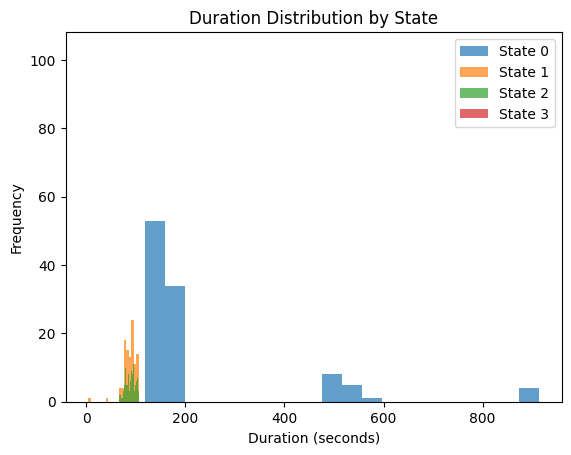

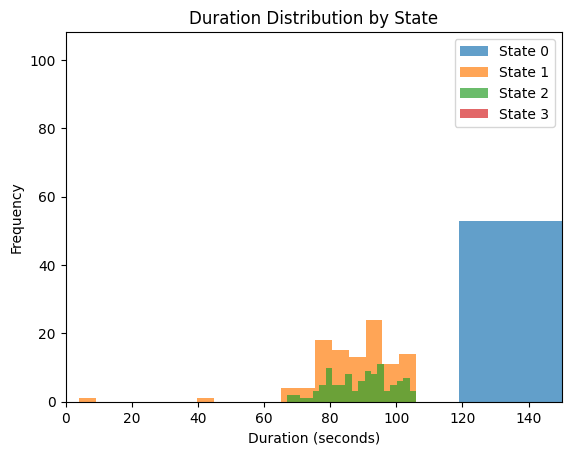

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_path = "C:/Users/82103/Desktop/multimodal/AGV/agv_merged_output.csv"

# 데이터 로드
data = pd.read_csv(csv_path)

# 상태 변화 구간 확인 및 지속 시간 계산
data['change'] = data['state'].diff().ne(0).cumsum()
durations = data.groupby(['change', 'state']).size().reset_index(name='duration')
print(durations)

# 상태별 지속 시간 통계 계산
state_durations = durations.groupby('state')['duration'].describe()
print(state_durations)

# 상태별 지속 시간 분포 시각화
for state, group in durations.groupby('state'):
    plt.hist(group['duration'], bins=20, alpha=0.7, label=f'State {state}')
plt.title('Duration Distribution by State')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 상태별 지속 시간 분포 시각화 (x축 200까지 제한)
for state, group in durations.groupby('state'):
    plt.hist(group['duration'], bins=20, alpha=0.7, label=f'State {state}')
plt.title('Duration Distribution by State')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim(0, 150)  # x축 범위를 0부터 150까지만 설정
plt.legend()
plt.show()


     change  state  duration
0         1      0       122
1         2      1        74
2         3      2        75
3         4      3        30
4         5      0       139
..      ...    ...       ...
651     652      3        30
652     653      0        84
653     654      1        93
654     655      2        94
655     656      3        30

[656 rows x 3 columns]
       count        mean         std   min    25%    50%     75%    max
state                                                                  
0      164.0  169.426829  188.969406  42.0  94.75  111.0  133.00  869.0
1      164.0   80.054878   10.677224  50.0  72.00   81.0   88.25  114.0
2      164.0   80.573171   10.677113  50.0  73.00   81.0   89.00  115.0
3      164.0   30.000000    0.000000  30.0  30.00   30.0   30.00   30.0


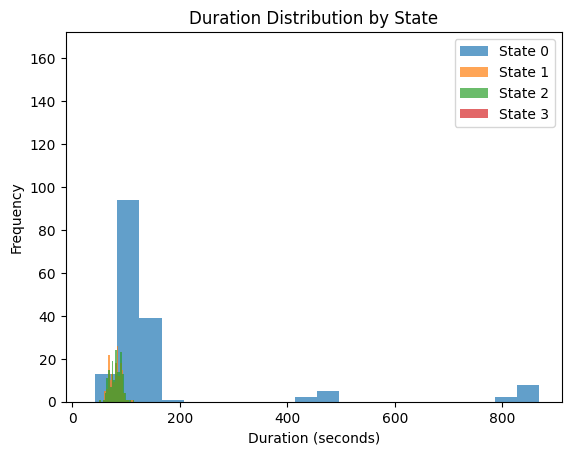

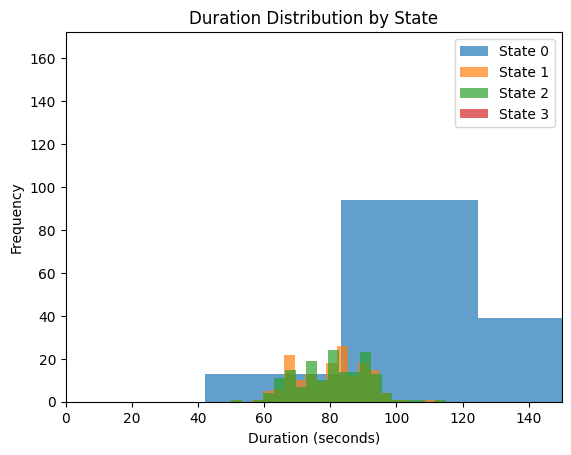

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_path = "C:/Users/82103/Desktop/multimodal/OHT/oht_merged_output.csv"

# 데이터 로드
data = pd.read_csv(csv_path)

# 상태 변화 구간 확인 및 지속 시간 계산
data['change'] = data['state'].diff().ne(0).cumsum()
durations = data.groupby(['change', 'state']).size().reset_index(name='duration')
print(durations)

# 상태별 지속 시간 통계 계산
state_durations = durations.groupby('state')['duration'].describe()
print(state_durations)

# 상태별 지속 시간 분포 시각화
for state, group in durations.groupby('state'):
    plt.hist(group['duration'], bins=20, alpha=0.7, label=f'State {state}')
plt.title('Duration Distribution by State')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 상태별 지속 시간 분포 시각화 (x축 200까지 제한)
for state, group in durations.groupby('state'):
    plt.hist(group['duration'], bins=20, alpha=0.7, label=f'State {state}')
plt.title('Duration Distribution by State')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim(0, 150)  # x축 범위를 0부터 150까지만 설정
plt.legend()
plt.show()


In [ ]:
2. 목적에 따른 기준 설정
안전성 중시:
실시간으로 긴급한 반응이 필요한 경우, 짧은 시간(1~2초)에도 즉각적으로 분류를 수행.
False Negative(위험인데 안전으로 분류)가 치명적이므로, 짧은 지속 시간도 "위험"으로 간주.
정확성 중시:
False Positive(안전인데 위험으로 분류)를 줄이는 것이 중요하다면, 더 긴 관찰 기간(5~10초)을 요구.

In [ ]:
3. 모델 기반 설정
분류 모델의 Confidence Score를 활용하여 일정 시간 동안의 평균 신뢰도를 기준으로 분류.
예: 3초 동안 "위험" 상황에 대해 모델의 예측 신뢰도가 80% 이상인 경우 "위험"으로 최종 판단.